In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
nt = 50000
dt = 0.1
Nu = 1.2e-1      # Holton pp 58
Ns = Nu/10.

      
#       nu = 0.12
#       ns = 0.012
#       dt = 0.1
# C                                                                                                                                 

#       w0d = 0.0001
#       w0 = 0.1
#       bs0d = 0.0001
#       bs0 = 0.1
#       bu0d = 0.0001
#       bu0 = 0.5

In [10]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

In [11]:
a = pd.read_csv('fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

tlm = pd.read_csv('fort.15', delim_whitespace=True, 
                header=None, names=['tlm_w', 'tlm_bu', 'tlm_bs'])
tlm_w = tlm.tlm_w.values
tlm_bu = tlm.tlm_bu.values
tlm_bs = tlm.tlm_bs.values

nlm = pd.read_csv('fort.14', delim_whitespace=True, 
                header=None, names=['nlm_w', 'nlm_bu', 'nlm_bs'])
nlm_w = nlm.nlm_w.values
nlm_bu = nlm.nlm_bu.values
nlm_bs = nlm.nlm_bs.values

In [12]:
tlm_bs[-1]

0.0001578142457407802

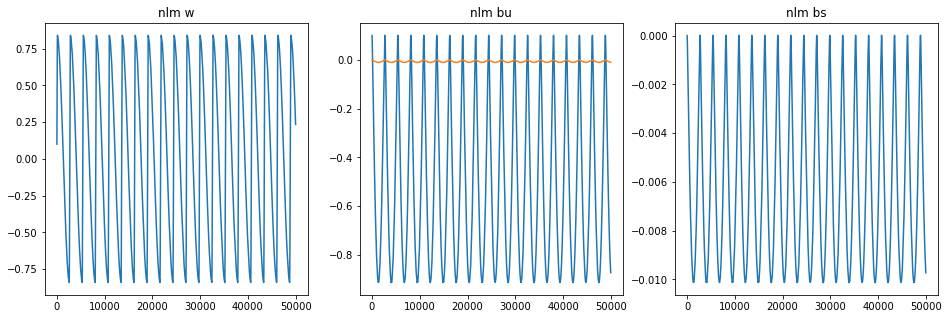

In [13]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(nlm_w, ax[0], "nlm w")
sens_subplots(nlm_bu, ax[1], "nlm bu")
sens_subplots(nlm_bs, ax[1], "nlm bu")
sens_subplots(nlm_bs, ax[2], "nlm bs")

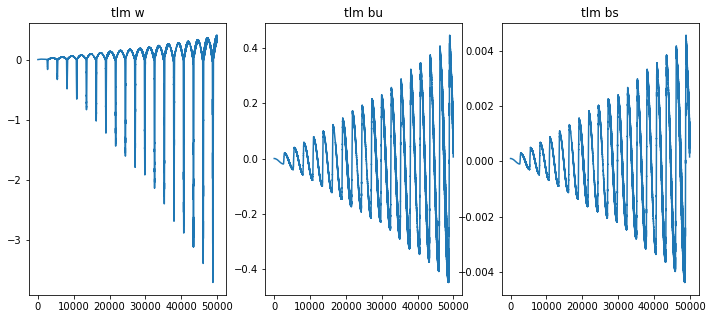

In [14]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(tlm_w, ax[0], 'tlm w')
sens_subplots(tlm_bu, ax[1], 'tlm bu')
sens_subplots(tlm_bs, ax[2], 'tlm bs')

ValueError: operands could not be broadcast together with shapes (49981,) (50000,) 

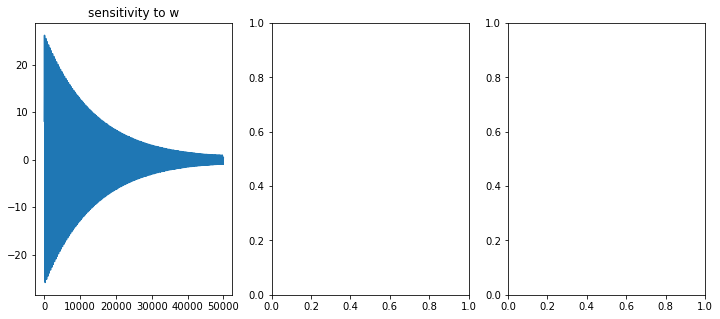

In [24]:
nrows = 1
ncols = 3
sk = 1
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(a_w, ax[0], 'sensitivity to w')
sens_subplots(a_bu*HuCu, ax[1], 'sensitivity to bu')
sens_subplots(a_bs*HsCs, ax[2], 'sensitivity to bs')

In [20]:
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)
Hu = np.zeros(nt)
Hs = np.zeros(nt)

alpha = 0.01


#       w0d = 0.0001
#       w0 = 0.1
#       bs0d = 0.0001
#       bs0 = 0.1
#       bu0d = 0.0001
#       bu0 = 0.5
        
w[0] = 0.1
bu[0] = 0.1
bs[0] = 0
t = 0
if bs[t] < bu[t]:
    Hs[t] = 0
    Hu[t] = 1
    w[t+1] = w[t] + bu[t]*dt
else:
    Hs[t] = 1
    Hu[t] = 0
    w[t+1] = w[t] + bs[t]*dt

bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
    
for t in range(1,nt-1):
    if bs[t] < bu[t]:
        Hs[t] = 0
        Hu[t] = 1
        w[t+1] = w[t-1] + bu[t]*dt*2
    else:
        Hs[t] = 1
        Hu[t] = 0
        w[t+1] = w[t-1] + bs[t]*dt*2
    
    bu[t+1] = bu[t-1] - (Nu**2)*w[t]*dt*2
    bs[t+1] = bs[t-1] - (Ns**2)*w[t]*dt*2
    
    
    bu[t] = bu[t] + alpha*(bu[t+1] - 2*bu[t] + bu[t-1])
    bs[t] = bs[t] + alpha*(bs[t+1] - 2*bs[t] + bs[t-1])
    w[t] = w[t] + alpha*(w[t+1] - 2*w[t] + w[t-1])


In [21]:
Cu = 1/Nu**2
Cs = 1/Ns**2
HuCu = Hu*Cu
HsCs = Hs*Cs

In [26]:
nlm_w.shape

(49981,)

$<Lx'\cdot Lx'> = <L^T(Lx')\cdot x'>$

In [28]:
wt = tlm_pert[0][-1]
but = tlm_pert[1][-1]
bst = tlm_pert[2][-1]
wt, but, bst

(-0.0021136518504991366, 0.004576240138814008, 4.666240138814002e-05)

In [35]:
#a_w[0]*wp[0] + a_bu[0]*bup[0] + a_bs[0]*bsp[0], wt**2 + but**2 + bst**2
#wp[0]= 1e-4  bup[0] = 1e-5 bsp[0] = 1e-6
wp[-1]*wp[-1], a_w[0]*wp[0]

(4.467524145118424e-06, -8.368575009999999e-07)

### ADJ in E-norm